In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

import mylibrary.nnlib as tnn
import copy

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

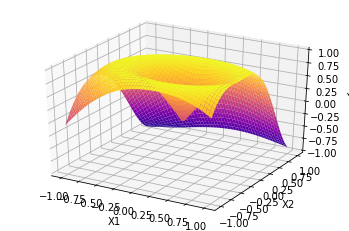

In [3]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Training Neural Network

In [4]:
optimizer = tnn.Adam()
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.NonLinearLayer(2, 5, activation=tnn.Relu(), optimizer=optimizer)
layer2 = tnn.NonLinearLayer(5, 5, activation=tnn.Relu(), optimizer=optimizer)
layer3 = tnn.LinearLayer(5, 1, optimizer = optimizer)

In [5]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  4.083577278550231


100 Error =  0.040723982428882935


200 Error =  0.028686006148871797


300 Error =  0.02498283336151379


400 Error =  0.02261468460917716


500 Error =  0.020872099664974806


600 Error =  0.019558279484207835


700 Error =  0.018666295528514218


800 Error =  0.018147800708093745


900 Error =  0.01784838480574181


1000 Error =  0.017666798016052046


1100 Error =  0.017524212023444487


1200 Error =  0.01738555931090975


1300 Error =  0.017232110061742394


1400 Error =  0.01708728474181284


1500 Error =  0.016940564295734453


1600 Error =  0.01682045396041782


1700 Error =  0.0167193097508386


1800 Error =  0.01661138345934911


1900 Error =  0.016523996235866086


2000 Error =  0.016454561258211407


2100 Error =  0.01637812093201077


2200 Error =  0.01631476034814509


2300 Error =  0.016252659521369693


2400 Error =  0.016173303202220077


2500 Error =  0.01612355645998551


2600 Error =  0.01605136118652466


2700 Error =  0.0159166820376

TclError: invalid command name "."

0.002156349509988488


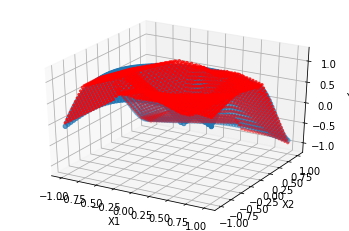

In [50]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X1');ax.set_ylabel('X2');ax.set_zlabel('Y')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
print(error)

# Sorting the neurons

In [209]:
n_neurons = [2,5,5,1]
space_D = 1
layers = [layer1, layer2, layer3]

In [210]:
positions = []
for i, neurons in enumerate(n_neurons):
    pos = np.random.uniform(size=(neurons, space_D))
    positions.append(pos)
positions[0][positions[0].argmax()] = 1.
positions[0][positions[0].argmin()] = 0.

positions

[array([[0.],
        [1.]]), array([[0.19808854],
        [0.81341891],
        [0.01127545],
        [0.91122721],
        [0.22713638]]), array([[0.96031723],
        [0.81444675],
        [0.15260728],
        [0.14690586],
        [0.06040857]]), array([[0.5168587]])]

In [211]:
### ALGORITHM ###
## Until convergence
'''
1. Normalize the input layer position to range [0,1]
    - Normalize other layer position by the same factor
2. Move the neurons iteratively to previous layers and next layers position.

'''
pass

In [212]:
mini, maxi = positions[0].min(), positions[0].max()
divisor = maxi-mini

for i in range(len(positions)):
    positions[i] = (positions[i]-mini)/divisor
positions

[array([[0.],
        [1.]]), array([[0.19808854],
        [0.81341891],
        [0.01127545],
        [0.91122721],
        [0.22713638]]), array([[0.96031723],
        [0.81444675],
        [0.15260728],
        [0.14690586],
        [0.06040857]]), array([[0.5168587]])]

In [171]:
wts = layer1.weights**2
wts

array([[3.00213973e-01, 6.70319210e-01, 6.46250334e-02, 1.09244292e-04,
        3.04719722e+00],
       [1.01703789e-01, 1.89732993e+00, 4.83684414e+00, 3.39137846e+00,
        6.49008684e-03]])

In [172]:
scaler0 = wts.sum(axis=1, keepdims=True)
scaler1 = wts.sum(axis=0, keepdims=True)
scaler0, scaler1

(array([[ 4.08246468],
        [10.23374641]]),
 array([[0.40191776, 2.56764914, 4.90146917, 3.39148771, 3.05368731]]))

In [129]:
wts/scaler1

array([[7.46953734e-01, 2.61063398e-01, 1.31848291e-02, 3.22113188e-05,
        9.97874672e-01],
       [2.53046266e-01, 7.38936602e-01, 9.86815171e-01, 9.99967789e-01,
        2.12532790e-03]])

In [130]:
positions[1]

array([[0.38087347],
       [0.59894294],
       [0.02387815],
       [0.05727991],
       [0.71944003]])

In [131]:
positions[0]*wts/scaler1 ##wishful position for the 

array([[7.46953734e-01, 2.61063398e-01, 1.31848291e-02, 3.22113188e-05,
        9.97874672e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [132]:
del_pos1 = (positions[0]*wts/scaler1).T
del_pos1, del_pos1.sum(axis=1, keepdims=True)

(array([[7.46953734e-01, 0.00000000e+00],
        [2.61063398e-01, 0.00000000e+00],
        [1.31848291e-02, 0.00000000e+00],
        [3.22113188e-05, 0.00000000e+00],
        [9.97874672e-01, 0.00000000e+00]]), array([[7.46953734e-01],
        [2.61063398e-01],
        [1.31848291e-02],
        [3.22113188e-05],
        [9.97874672e-01]]))

In [176]:
wts/scaler0 ## 

array([[7.35374331e-02, 1.64194736e-01, 1.58299063e-02, 2.67593967e-05,
        7.46411165e-01],
       [9.93807982e-03, 1.85399350e-01, 4.72636701e-01, 3.31391684e-01,
        6.34184841e-04]])

In [175]:
positions[1].T

array([[7.44093732e-01, 2.63703082e-01, 1.32683706e-02, 4.79458933e-04,
        9.95699401e-01]])

In [174]:
del_pos0 = positions[1].T*wts/scaler0
del_pos0, del_pos0.mean(axis=1, keepdims=True)

(array([[5.47187430e-02, 4.32986578e-02, 2.10037064e-04, 1.28300318e-08,
         7.43201151e-01],
        [7.39486291e-03, 4.88903800e-02, 6.27111892e-03, 1.58888703e-04,
         6.31457467e-04]]), array([[0.16828572],
        [0.01266934]]))

In [258]:
### Method 1
## uses weight squared
## normalized the factor by max normalizing in for individual neurons

del_positions = [0]*len(positions)
for i, layer in enumerate(layers):
#     print(i, layer.weights.shape)
    wts = layer.weights**2
    scaler0 = wts.sum(axis=1, keepdims=True)
    scaler1 = wts.sum(axis=0, keepdims=True)
    
    del_pos0 = positions[i+1].T*wts/scaler0
    del_pos0 = del_pos0.sum(axis=1, keepdims=True)
    
    del_pos1 = (positions[i]*wts/scaler1).T
    del_pos1 = del_pos1.sum(axis=1, keepdims=True)
    
    del_positions[i] += del_pos0
    del_positions[i+1] += del_pos1

In [259]:
# del_positions[0] = positions[0]
del_positions[0] = 2*positions[0]
del_positions[-1] = 2*positions[-1]
for i in range(len(del_positions)):
    del_positions[i] = del_positions[i]/2.

In [260]:
# del_positions

In [261]:
## update positions
lr = 0.2
for i in range(len(positions)):
    positions[i] = lr*del_positions[i] + (1-lr)*positions[i]
positions

[array([[0.],
        [1.]]), array([[0.33794958],
        [0.61175636],
        [0.71356784],
        [0.76109957],
        [0.23852609]]), array([[0.4421985 ],
        [0.5851718 ],
        [0.46615024],
        [0.43257566],
        [0.54973606]]), array([[0.5168587]])]

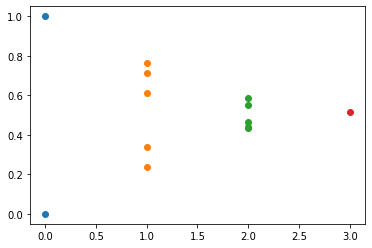

In [262]:
### Plotting the neurons
%matplotlib inline
for i, pos in enumerate(positions):
    plt.scatter([i]*len(pos), pos)

## Doing this iteratively

In [271]:
n_neurons = [2,5,5,1]
space_D = 1
layers = [layer1, layer2, layer3]

In [272]:
def initialize_positions(layers, n_neurons, space_D):
    positions = []
    for i, neurons in enumerate(n_neurons):
        pos = np.random.uniform(size=(neurons, space_D))
        positions.append(pos)
    return positions

In [273]:
def normalize_positions(positions):
    mini, maxi = positions[0].min(), positions[0].max()
    divisor = maxi-mini

    for i in range(len(positions)):
        positions[i] = (positions[i]-mini)/divisor
    return positions

In [285]:
def compute_del_positions(positions, layers):
    del_positions = [0]*len(positions)
    for i, layer in enumerate(layers):
        wts = layer.weights**2
        scaler0 = wts.sum(axis=1, keepdims=True)
        scaler1 = wts.sum(axis=0, keepdims=True)

        del_pos0 = positions[i+1].T*wts/scaler0
        del_pos0 = del_pos0.sum(axis=1, keepdims=True)

        del_pos1 = (positions[i]*wts/scaler1).T
        del_pos1 = del_pos1.sum(axis=1, keepdims=True)

        del_positions[i] += del_pos0
        del_positions[i+1] += del_pos1
        
#     del_positions[0] = positions[0]
#     del_positions[-1] = del_positions[-1]
    for i in range(1, len(del_positions)-1):
        del_positions[i] = del_positions[i]/2.    
    return del_positions

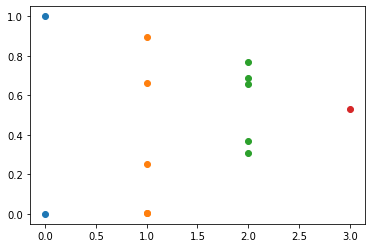

In [297]:
positions = initialize_positions(layers, n_neurons, space_D)
positions[0] = np.array([[0], [1]])
positions = normalize_positions(positions)
# for i, position in enumerate(positions):
#     print(i,position)

%matplotlib inline
for i, pos in enumerate(positions):
    plt.scatter([i]*len(pos), pos)

In [298]:
lr = 0.5

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for epoch in range(1000):
    
    if epoch%1 == 0:
        ax.clear()
        for i, pos in enumerate(positions):
            ax.scatter([i]*len(pos), pos)
        fig.canvas.draw()
        plt.pause(0.01)
        
    positions = normalize_positions(positions)
    del_positions = compute_del_positions(positions, layers)
    for i in range(len(positions)):
        positions[i] = lr*del_positions[i] + (1-lr)*positions[i]

TclError: invalid command name "pyimage248"

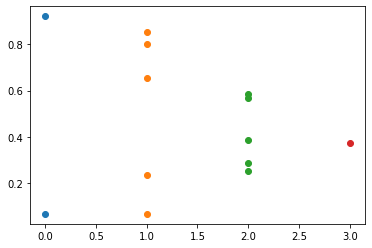

In [299]:
%matplotlib inline
for i, pos in enumerate(positions):
    plt.scatter([i]*len(pos), pos)